In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
import math

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
raw_data = pd.read_csv('D:/prjcts new/FYENN_Lab/Car details v3.csv')


In [ ]:
def PercentageofMissingData(dataset):
    return dataset.isna().sum()/len(dataset*100)
print(raw_data.isnull().sum())
print()
print(PercentageofMissingData(raw_data))


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.027190
engine           0.027190
max_power        0.026452
torque           0.027313
seats            0.027190
dtype: float64


In [ ]:
raw_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
raw_data.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [ ]:
raw_data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
raw_data.dropna(inplace=True, axis=0, how='any')
raw_data.duplicated().sum()
raw_data.drop_duplicates(inplace=True)


In [ ]:
raw_data['mileage']=raw_data['mileage'].replace(' kmpl','',regex=True).str.replace(',', '')
raw_data['mileage']=raw_data['mileage'].replace(' km/kg','',regex=True).str.replace(',', '')
raw_data['engine']=raw_data['engine'].replace(' CC','',regex=True).str.replace(',', '')
raw_data['max_power']=raw_data['max_power'].replace(' bhp','',regex=True).str.replace(',', '')

In [ ]:


raw_data['mileage'] = pd.to_numeric(raw_data['mileage'])
raw_data['engine'] = pd.to_numeric(raw_data['engine'])
raw_data['max_power'] = pd.to_numeric(raw_data['max_power'])
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   int64  
 10  max_power      6717 non-null   float64
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 734.7+ KB


Text(0.5, 0, 'Selling_Price')

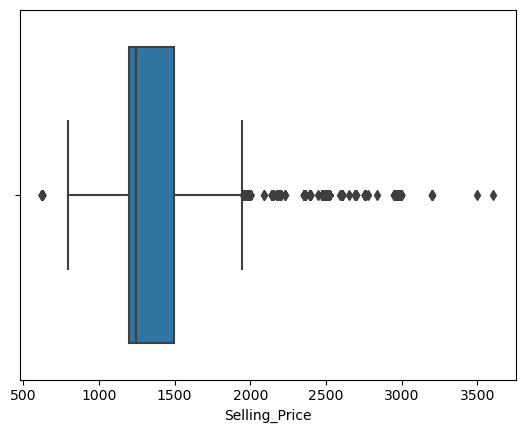

In [ ]:
sns.boxplot(raw_data['engine'])
plt.xlabel('Selling_Price')

In [ ]:
Q1 = raw_data['engine'].quantile(0.25)
Q3 = raw_data['engine'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

raw_data[raw_data['engine']> upper_limit]
raw_data[raw_data['engine']< lower_limit]

raw_data = raw_data[raw_data['engine'] < upper_limit]
raw_data.shape

(5535, 13)

Text(0.5, 0, 'Selling_Price')

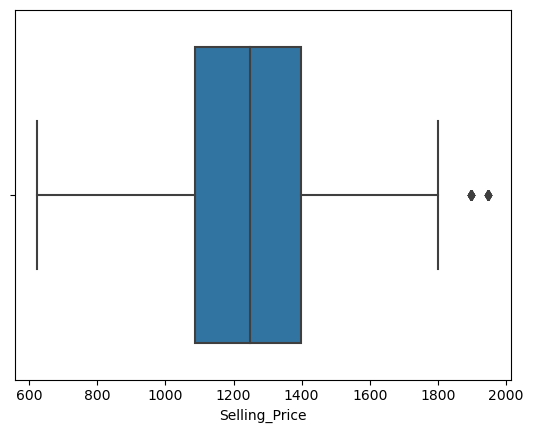

In [ ]:
sns.boxplot(raw_data['engine'])
plt.xlabel('Selling_Price')

Text(0.5, 0, 'Selling_Price')

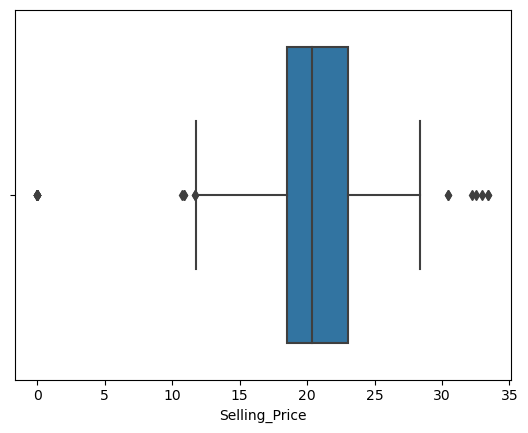

In [ ]:
sns.boxplot(raw_data['mileage'])
plt.xlabel('Selling_Price')

In [ ]:
Q1 = raw_data['mileage'].quantile(0.25)
Q3 = raw_data['mileage'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

raw_data[raw_data['mileage']> upper_limit]
raw_data[raw_data['mileage']< lower_limit]

raw_data = raw_data[raw_data['mileage'] < upper_limit]
raw_data.shape

(5528, 13)

Text(0.5, 0, 'Selling_Price')

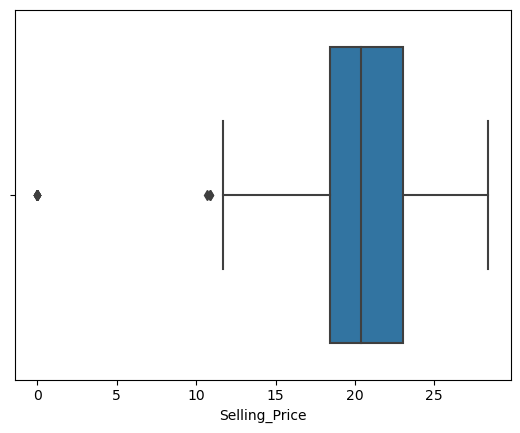

In [ ]:
sns.boxplot(raw_data['mileage'])
plt.xlabel('Selling_Price')

Text(0.5, 0, 'Selling_Price')

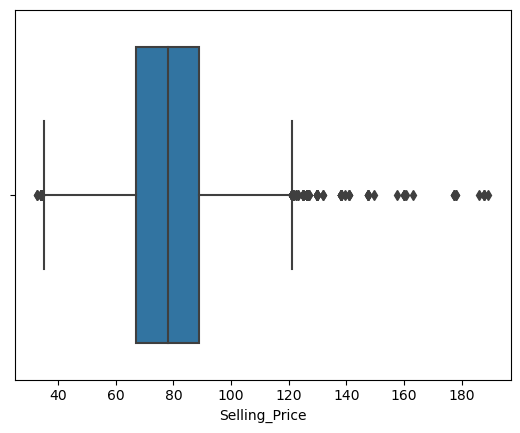

In [ ]:
sns.boxplot(raw_data['max_power'])
plt.xlabel('Selling_Price')

In [ ]:
Q1 = raw_data['max_power'].quantile(0.25)
Q3 = raw_data['max_power'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

raw_data[raw_data['max_power']> upper_limit]
raw_data[raw_data['max_power']< lower_limit]

raw_data = raw_data[raw_data['max_power'] < upper_limit]
raw_data.shape

(5275, 13)

Text(0.5, 0, 'Selling_Price')

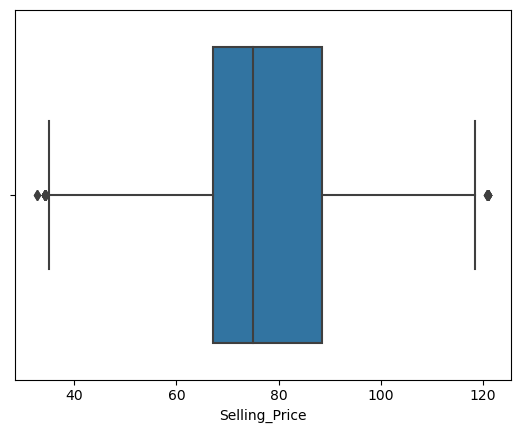

In [ ]:
sns.boxplot(raw_data['max_power'])
plt.xlabel('Selling_Price')

Text(0.5, 0, 'Selling_Price')

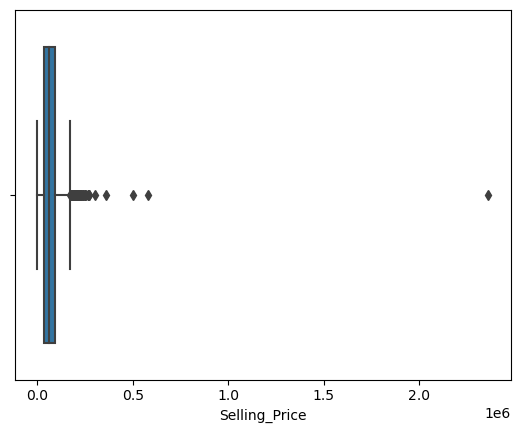

In [ ]:
sns.boxplot(raw_data['km_driven'])
plt.xlabel('Selling_Price')

In [ ]:
Q1 = raw_data['km_driven'].quantile(0.25)
Q3 = raw_data['km_driven'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

raw_data[raw_data['km_driven']> upper_limit]
raw_data[raw_data['km_driven']< lower_limit]

raw_data = raw_data[raw_data['km_driven'] < upper_limit]
raw_data.shape

(5155, 13)

Text(0.5, 0, 'Selling_Price')

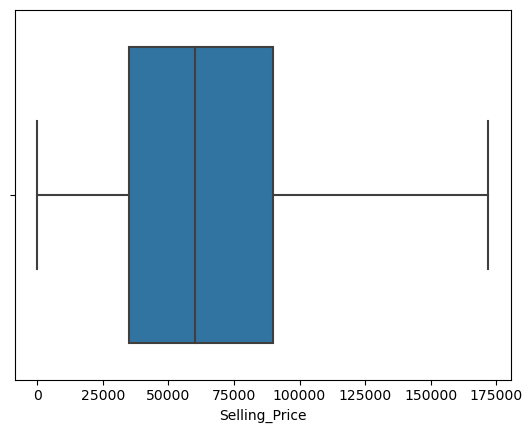

In [ ]:
sns.boxplot(raw_data['km_driven'])
plt.xlabel('Selling_Price')

Text(0.5, 0, 'Selling_Price')

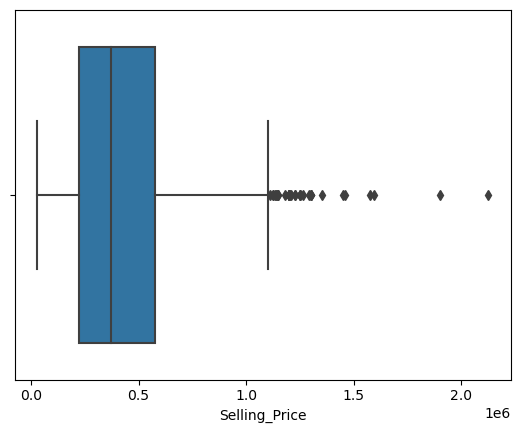

In [ ]:
sns.boxplot(raw_data['selling_price'])
plt.xlabel('Selling_Price')

In [ ]:
Q1 = raw_data['selling_price'].quantile(0.25)
Q3 = raw_data['selling_price'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

raw_data[raw_data['selling_price']> upper_limit]
raw_data[raw_data['selling_price']< lower_limit]

raw_data = raw_data[raw_data['selling_price'] < upper_limit]
raw_data.shape
#raw_data['selling_price'] = raw_data['selling_price'][raw_data['selling_price']\
                                     #.between(raw_data['selling_price'].quantile(.05), \
                                              #raw_data['selling_price'].quantile(.99))]

(5116, 13)

Text(0.5, 0, 'Selling_Price')

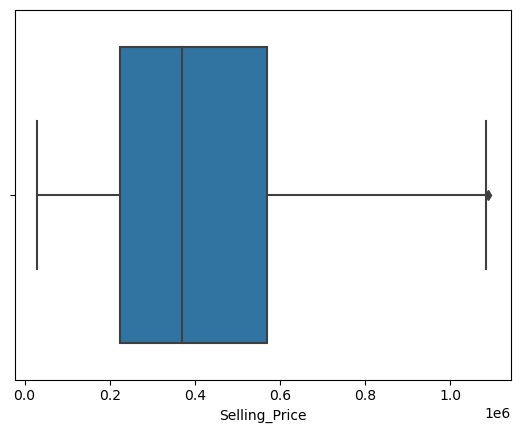

In [ ]:
sns.boxplot(raw_data['selling_price'])
plt.xlabel('Selling_Price')

In [ ]:
raw_data.dropna(inplace=True, axis=0, how='any')
raw_data.drop_duplicates(inplace=True)
raw_data.duplicated().sum()

0

In [ ]:
print(raw_data['selling_price'].quantile(0.01))
print(raw_data['selling_price'].quantile(0.99))

50000.0
960000.0


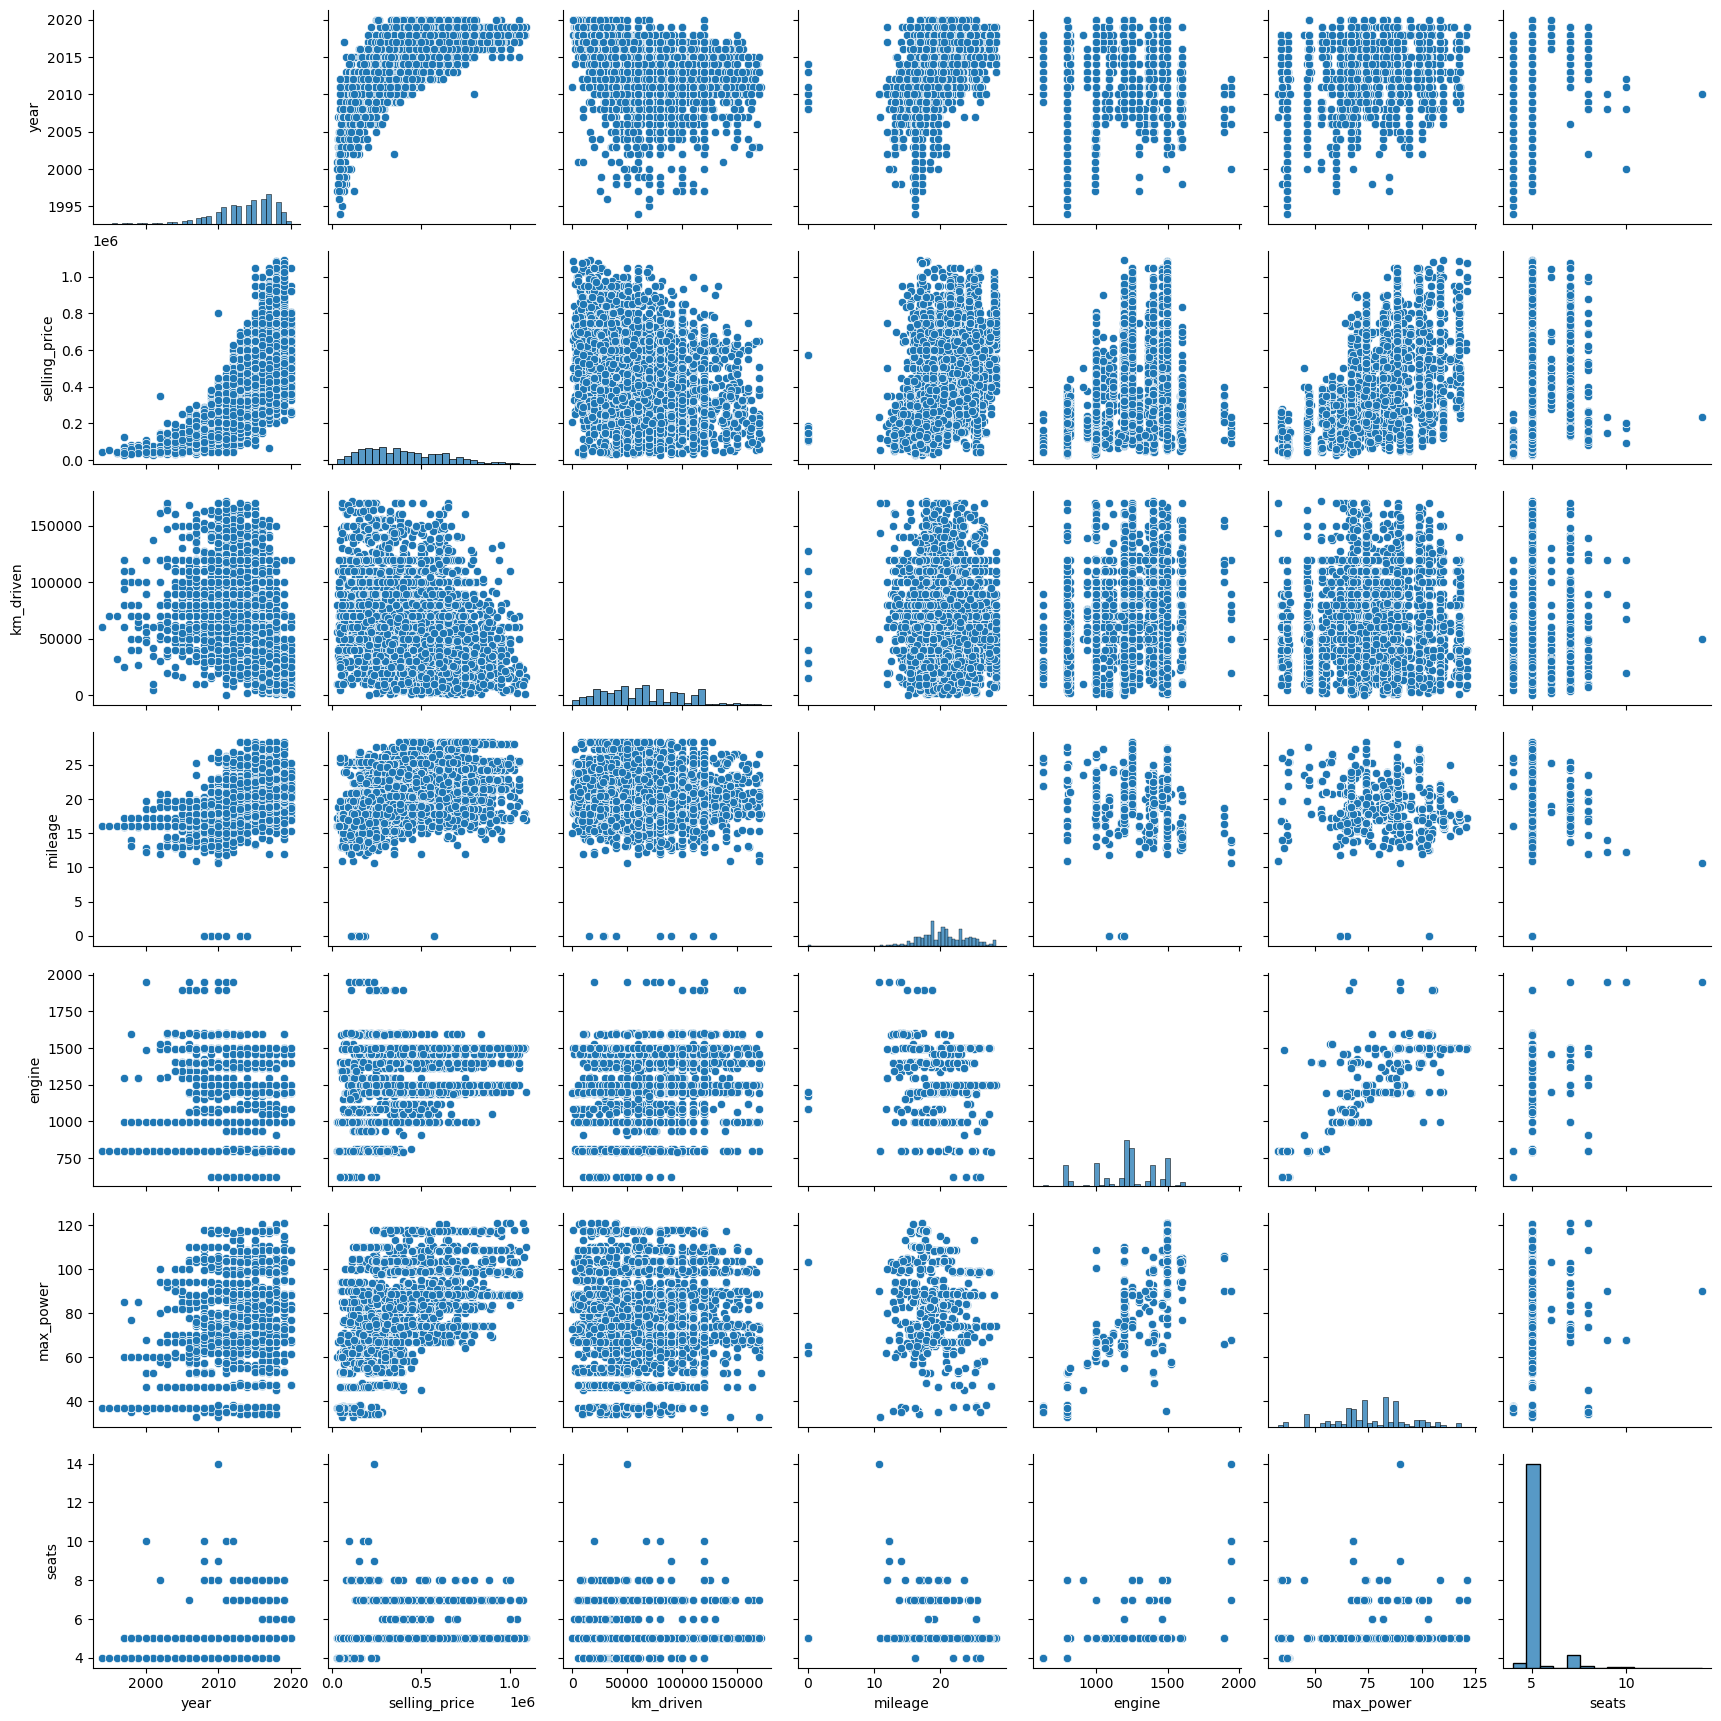

In [ ]:
sns.pairplot(raw_data)

In [ ]:
correlation = raw_data.corr()
correlation

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.727428,-0.468048,0.443671,0.092714,0.289751,0.173404
selling_price,0.727428,1.000000,-0.332019,0.350145,0.399273,0.581425,0.222495
km_driven,-0.468048,-0.332019,1.000000,-0.096008,0.236824,0.017760,0.023998
mileage,0.443671,0.350145,-0.096008,1.000000,-0.092882,-0.054663,-0.092900
engine,0.092714,0.399273,0.236824,-0.092882,1.000000,0.799610,0.206388
max_power,0.289751,0.581425,0.017760,-0.054663,0.799610,1.000000,0.170736
seats,0.173404,0.222495,0.023998,-0.092900,0.206388,0.170736,1.000000


In [ ]:
X=raw_data.drop(columns=['torque','selling_price','name'],axis=1)
y=raw_data['selling_price']

In [ ]:
X=pd.get_dummies(X,columns=['fuel','seller_type','transmission','owner'],\
                 prefix=['fuel','seller_type','transmission','owner'],drop_first=True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
X=scalar.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, shuffle=False,)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (4092, 15)
X_test shape (1024, 15)
y_train shape (4092,)
y_test shape (1024,)


In [ ]:
from xgboost import XGBRegressor
regressor = XGBRegressor(
    gamma=0,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=1000,
    n_jobs=16,
    objective='reg:squarederror',
    subsample=0.8,
    scale_pos_weight=0,
    reg_alpha=0,
    reg_lambda=1
)

model = regressor.fit(X_train, y_train)


In [ ]:
trainPredict = model.predict(X_train)

testPredict = model.predict(X_test)

In [ ]:
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor = RandomForestRegressor( random_state=42).fit(X_train, y_train)
print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))

0.9828306382474902
0.87254144208065


R-Squared: 0.87254144208065
MAE: 57096.58707918788
MSE: 6429499245.065012
RMSE: 80184.15831736973


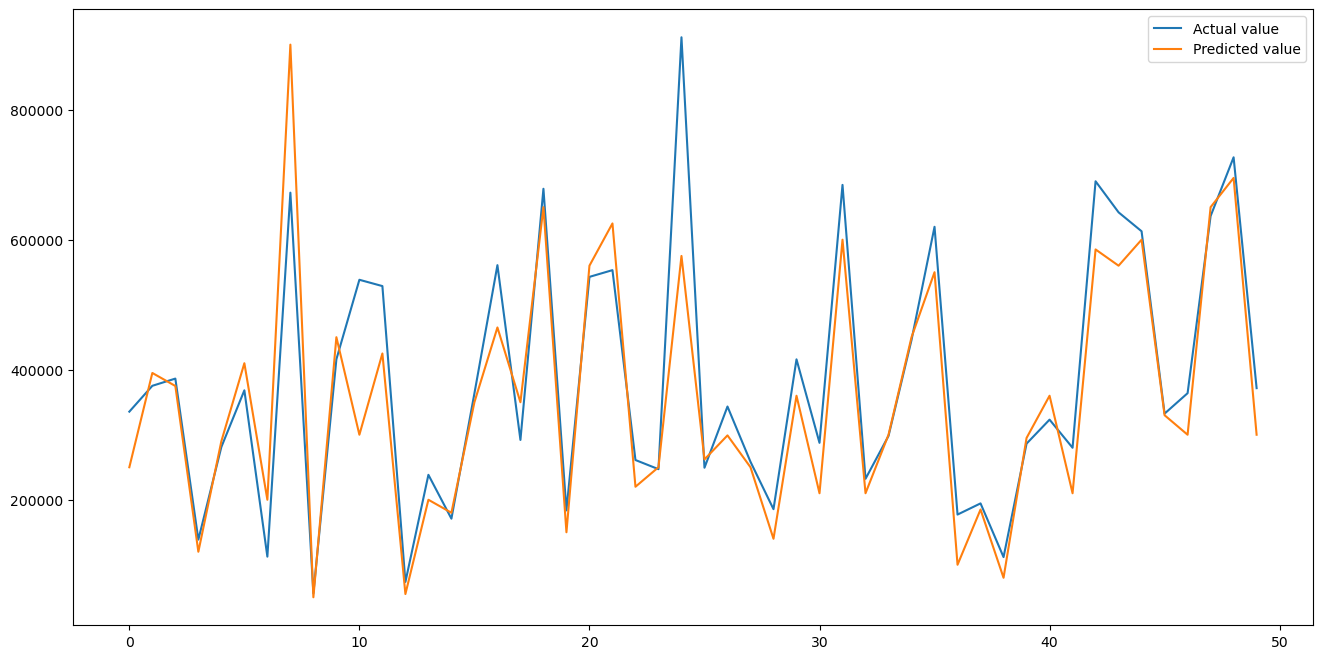

In [ ]:
y_pred=regressor.predict(X_test)
train_pred=regressor.predict(X_train)

from sklearn.metrics import mean_absolute_error

print('R-Squared:',metrics.r2_score(y_test, y_pred)) 
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])


In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state = 0)
DTR.fit(X_train, y_train)
print(DTR.score(X_train, y_train))
print(DTR.score(X_test, y_test))


0.9961997753240429
0.8009494817543332


R-Squared: 0.8009494817543332
RMSE: 100204.15518946007


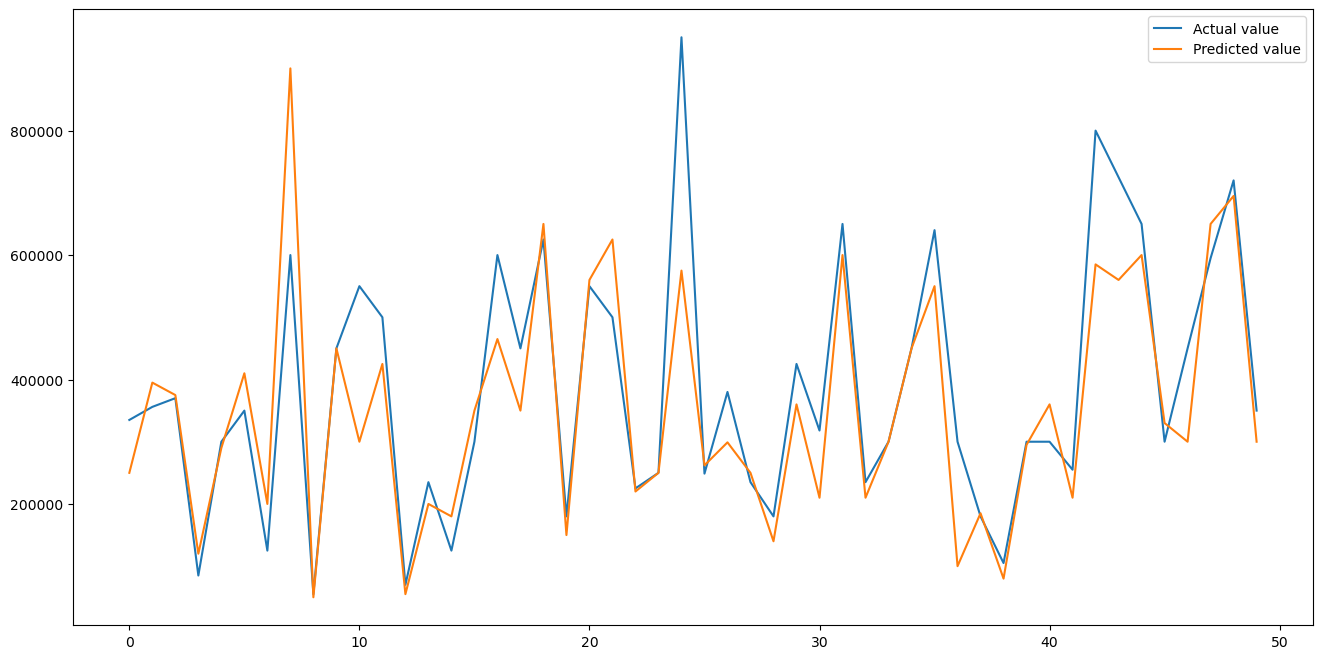

In [ ]:
y_pred_DTR = DTR.predict(X_test)
train_pred_DTR=DTR.predict(X_train)

print('R-Squared:',metrics.r2_score(y_test,y_pred_DTR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_DTR)))

test = pd.DataFrame({'Predicted value':y_pred_DTR, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
import numpy as np

X, y = make_classification(n_samples=100, n_features=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBClassifier()


try:
    xgb.fit(X_train, y_train)
    print("Training score:", xgb.score(X_train, y_train))
except Exception as e:
    print("Error during model fitting:", str(e))


Training score: 1.0


R-Squared: 1.0
RMSE: 0.0


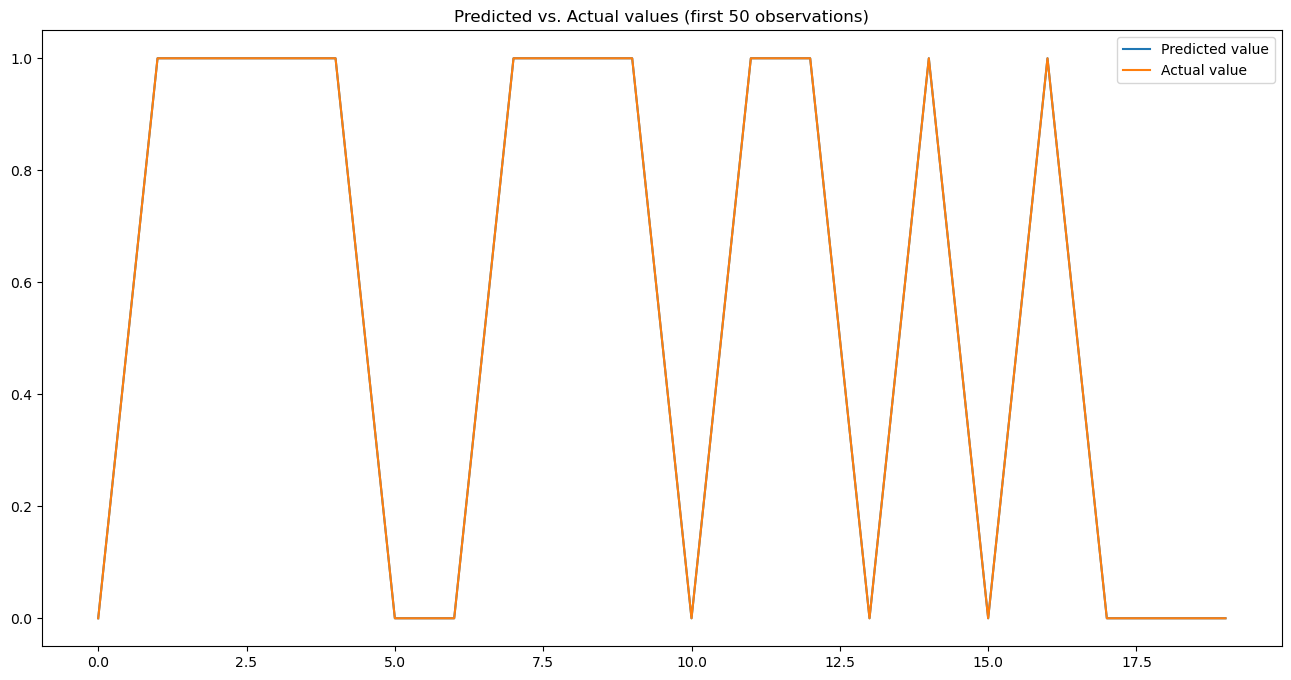

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from xgboost import XGBRegressor  # Use XGBRegressor for regression tasks

# Generate predictions for both training and testing datasets
y_pred_xgb = xgb.predict(X_test)
train_pred_xgb = xgb.predict(X_train)

# Calculate performance metrics
r2 = metrics.r2_score(y_test, y_pred_xgb)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))

print('R-Squared:', r2)
print('RMSE:', rmse)

# Create a DataFrame with actual and predicted values
test = pd.DataFrame({'Predicted value': y_pred_xgb, 'Actual value': y_test})

# Reset index if needed
test.reset_index(drop=True, inplace=True)

# Plotting the first 50 observations
fig = plt.figure(figsize=(16, 8))
plt.plot(test[:50])  # Plot the first 50 observations

# Better labeling for the legend
plt.legend(['Predicted value', 'Actual value'], loc='upper right')
plt.title("Predicted vs. Actual values (first 50 observations)")
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=42)
reg.fit(X_train, y_train)
reg_pred=reg.predict(X_test)
print(reg.score(X_train, y_train))

0.9999892459040851


R-Squared: 0.7478516595148588
RMSE: 0.24981335887032236


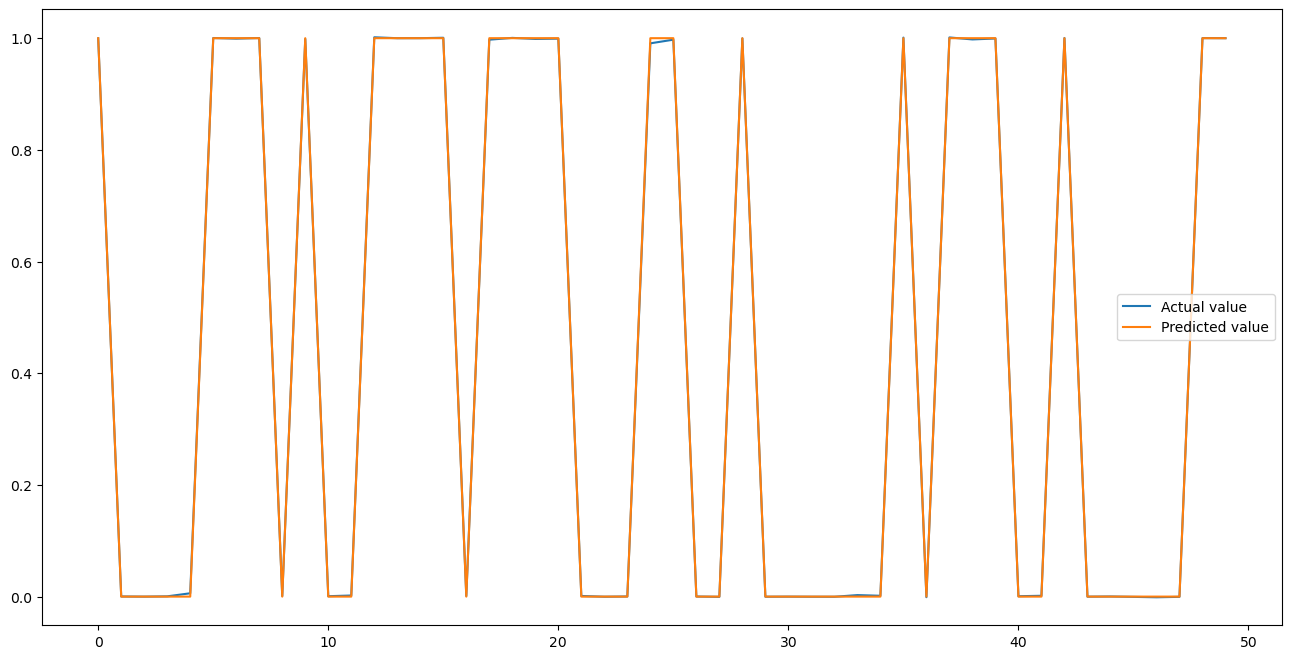

In [ ]:
y_pred_reg = reg.predict(X_test)
train_pred_reg=reg.predict(X_train)

print('R-Squared:',metrics.r2_score(y_test,y_pred_reg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_reg)))

test = pd.DataFrame({'Predicted value':train_pred_reg, 'Actual value':y_train})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier().fit(X_train,y_train)
print(kn.score(X_train, y_train))

0.9625


In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))


0.7912799465000177


In [ ]:
y_pred = lr.predict(X_test)
train_pred_lin=lr.predict(X_train)

print('R-Squared:',metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R-Squared: 0.852942181093614
RMSE: 0.19077948049863888


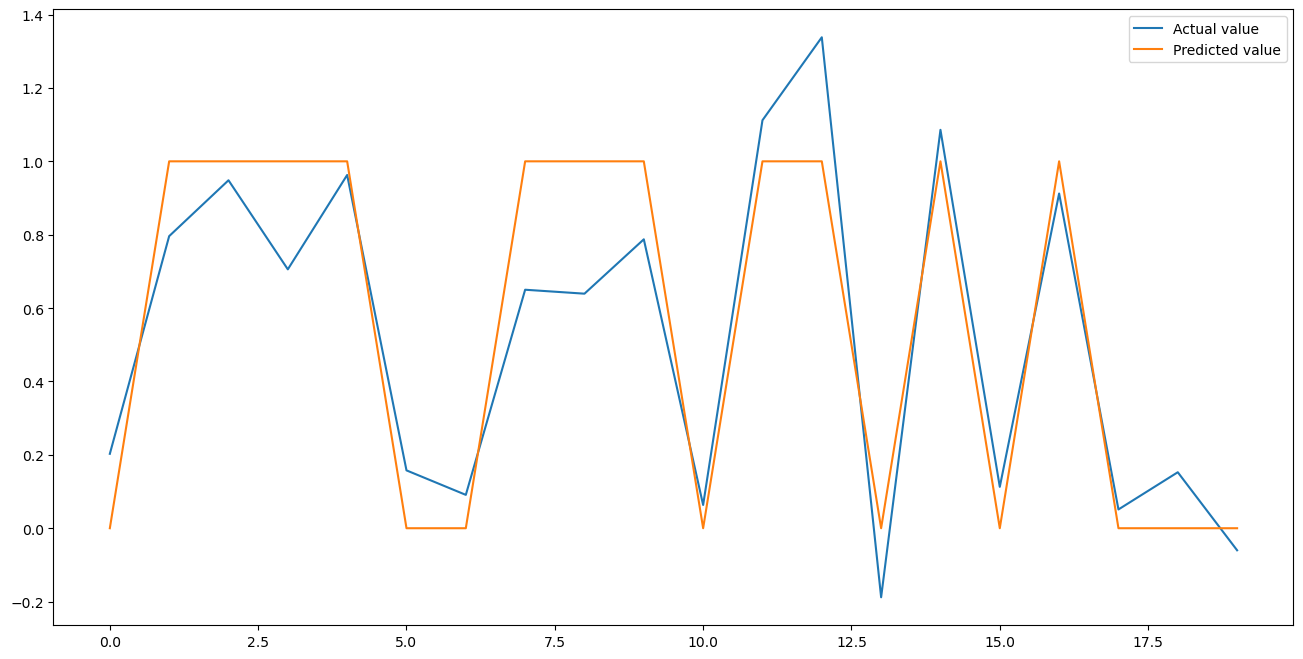

In [ ]:

test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])